# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import conexion_db
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.cm as cm

In [ ]:
temporada = '25/26'

# 1. Usuarios que más cláusulas HAN HECHO (robado)

C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\704614284.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_realizadas = pd.read_sql(query_realizadas, conn)


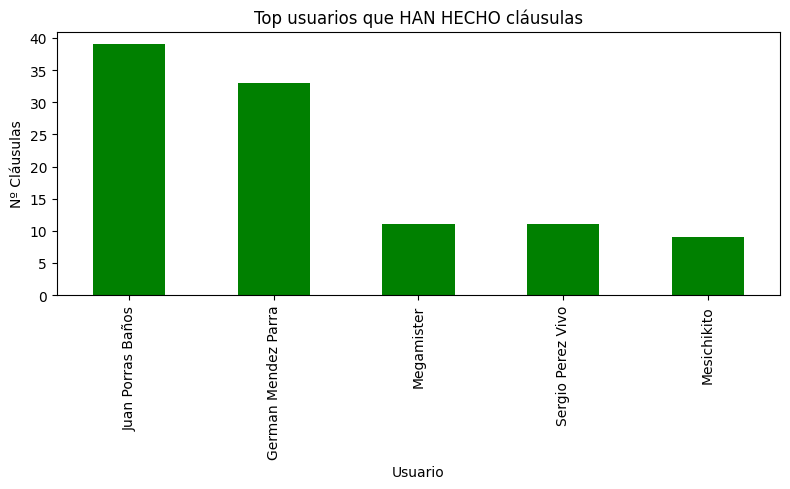

In [3]:
with conexion_db() as conn:
    query_realizadas = """
        SELECT usuario_destino AS usuario, COUNT(*) AS clausulas_realizadas
        FROM chavalitos.v_transferencias
        WHERE tipo_operacion = 'Cláusula'
          AND temporada = '25/26'
        GROUP BY usuario_destino
        ORDER BY clausulas_realizadas DESC
        LIMIT 5;
    """
    df_realizadas = pd.read_sql(query_realizadas, conn)

fig, ax = plt.subplots(figsize=(8, 5))
df_realizadas.plot(kind='bar', x='usuario', y='clausulas_realizadas', legend=False, ax=ax, color='green')
ax.set_title('Top usuarios que HAN HECHO cláusulas')
ax.set_xlabel('Usuario')
ax.set_ylabel('Nº Cláusulas')
plt.tight_layout()
plt.show()

 # 2. Usuarios que más cláusulas HAN SUFRIDO

C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\579975840.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sufridas = pd.read_sql(query_sufridas, conn)


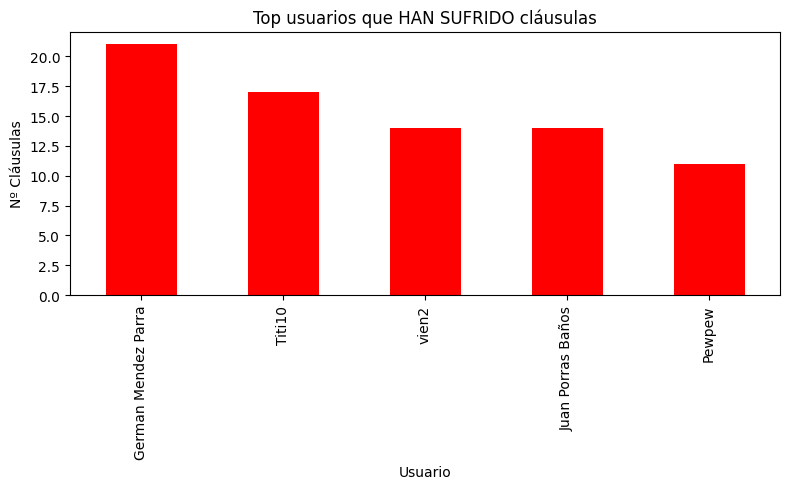

In [4]:
with conexion_db() as conn:
    query_sufridas = """
        SELECT usuario_origen AS usuario, COUNT(*) AS clausulas_sufridas
        FROM chavalitos.v_transferencias
        WHERE tipo_operacion = 'Cláusula'
          AND temporada = '25/26'
        GROUP BY usuario_origen
        ORDER BY clausulas_sufridas DESC
        LIMIT 5;
    """
    df_sufridas = pd.read_sql(query_sufridas, conn)

fig, ax = plt.subplots(figsize=(8, 5))
df_sufridas.plot(kind='bar', x='usuario', y='clausulas_sufridas', legend=False, ax=ax, color='red')
ax.set_title('Top usuarios que HAN SUFRIDO cláusulas')
ax.set_xlabel('Usuario')
ax.set_ylabel('Nº Cláusulas')
plt.tight_layout()
plt.show()

# 3. Tops robos entre usuarios

C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\484139515.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_robos = pd.read_sql(query_robos, conn)


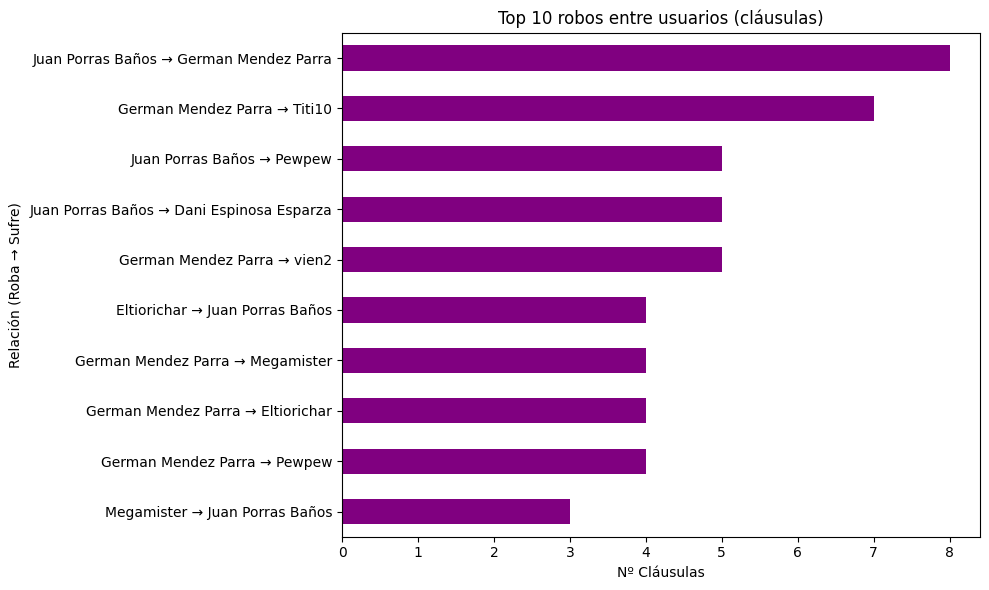

In [5]:
with conexion_db() as conn:
    query_robos = """
        SELECT 
            usuario_destino AS quien_roba,
            usuario_origen AS quien_sufre,
            COUNT(*) AS clausulas
        FROM chavalitos.v_transferencias
        WHERE tipo_operacion = 'Cláusula'
          AND temporada = '25/26'
        GROUP BY usuario_destino, usuario_origen
        ORDER BY clausulas DESC
        LIMIT 10;
    """
    df_robos = pd.read_sql(query_robos, conn)

# Crear una nueva columna para mostrar la relación
df_robos['relacion'] = df_robos['quien_roba'] + ' → ' + df_robos['quien_sufre']

# Gráfico
fig, ax = plt.subplots(figsize=(10, 6))
df_robos.plot(kind='barh', x='relacion', y='clausulas', ax=ax, color='purple', legend=False)
ax.set_title('Top 10 robos entre usuarios (cláusulas)')
ax.set_xlabel('Nº Cláusulas')
ax.set_ylabel('Relación (Roba → Sufre)')
plt.gca().invert_yaxis()  # Para que el más alto aparezca arriba
plt.tight_layout()
plt.show()


# 4. HeatMap Robos entre usuarios

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\2185274892.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



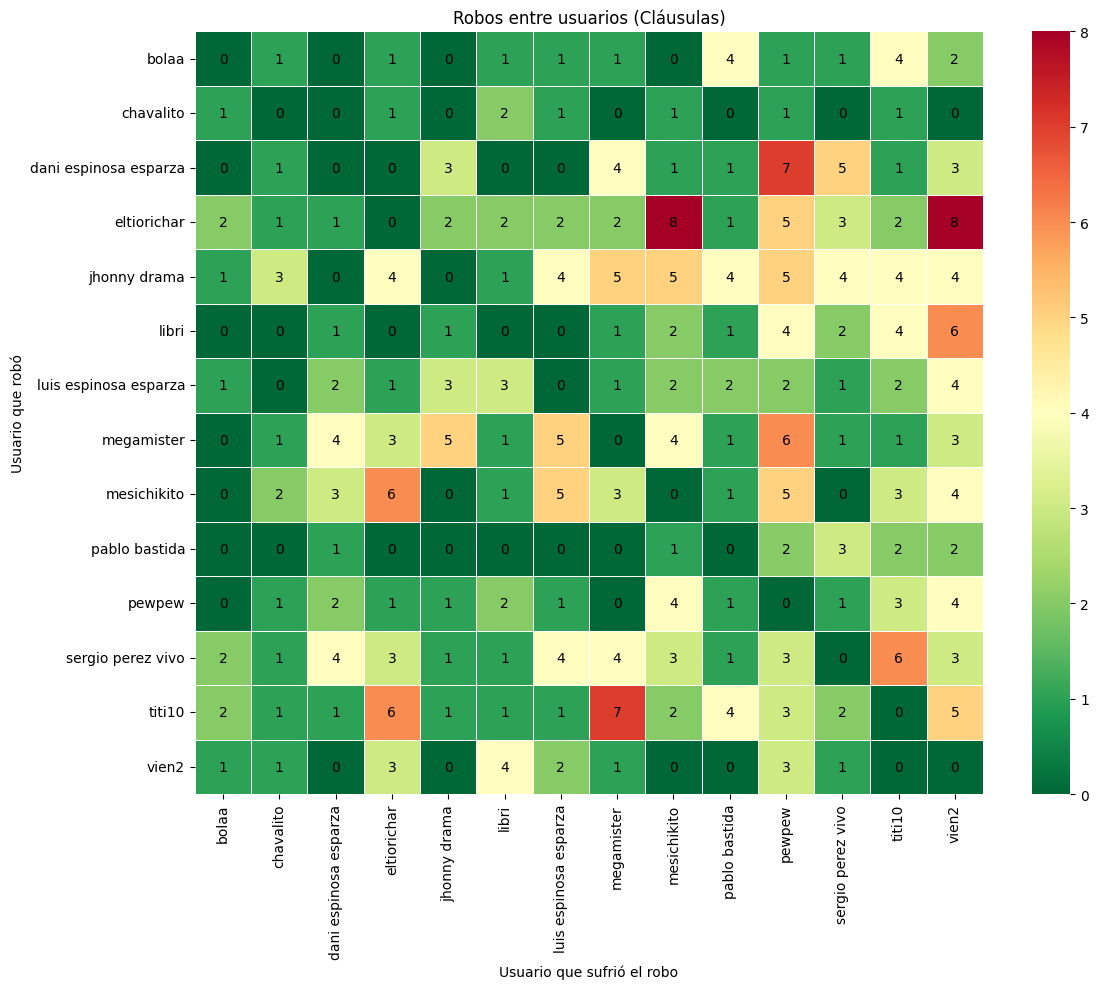

In [ ]:
# 1. Cargar datos brutos
with conexion_db() as conn:
    query = """
        SELECT 
            usuario_destino AS quien_roba,
            usuario_origen AS quien_sufre,
            COUNT(*) AS clausulas
        FROM chavalitos.v_transferencias
        WHERE tipo_operacion = 'Cláusula'
          AND fecha_transferencia BETWEEN '2024-08-15' AND '2025-06-30'
        GROUP BY usuario_destino, usuario_origen;
    """
    df_raw = pd.read_sql(query, conn)

# 2. Limpiar antes de agrupar
df_raw['quien_roba'] = df_raw['quien_roba'].str.strip().str.lower()
df_raw['quien_sufre'] = df_raw['quien_sufre'].str.strip().str.lower()

# 3. Re-agrupar (por si los nombres duplicados generaron filas separadas)
df = df_raw.groupby(['quien_roba', 'quien_sufre'], as_index=False).sum()

# 4. Crear la tabla pivote
pivot = df.pivot(index='quien_roba', columns='quien_sufre', values='clausulas').fillna(0)

# 5. Visualizar
plt.figure(figsize=(12, 10))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap='RdYlGn_r',
    linewidths=0.5,
    cbar=True,
    annot_kws={"size": 10, "color": "black"}
)
plt.title("Robos entre usuarios (Cláusulas)")
plt.xlabel("Usuario que sufrió el robo")
plt.ylabel("Usuario que robó")
plt.tight_layout()
plt.show()


# 5. Jugador con más clausulazos

C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\4119292642.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_raw = pd.read_sql(query, conn)


TypeError: 'value' must be an instance of str or bytes, not a float

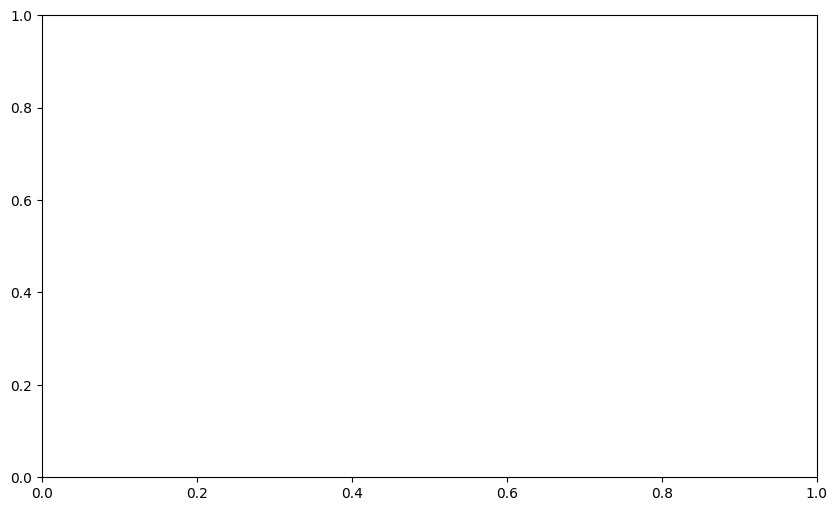

In [6]:
with conexion_db() as conn:
    query = """
        SELECT 
            nombre,
            apellido,
            COUNT(*) AS clausulazos
        FROM chavalitos.v_transferencias
        WHERE tipo_operacion = 'Cláusula'
          AND temporada = '25/26'
        GROUP BY nombre, apellido
        ORDER BY clausulazos DESC
        LIMIT 10;
    """
    df_raw = pd.read_sql(query, conn)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(
    df_raw['nombre'] + ' ' + df_raw['apellido'],
    df_raw['clausulazos'],
    color='crimson'
)
plt.xlabel('Número de clausulazos')
plt.title('Top 5 jugadores con más cláusulas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 6. Jugador con más traspasos

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\549213003.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



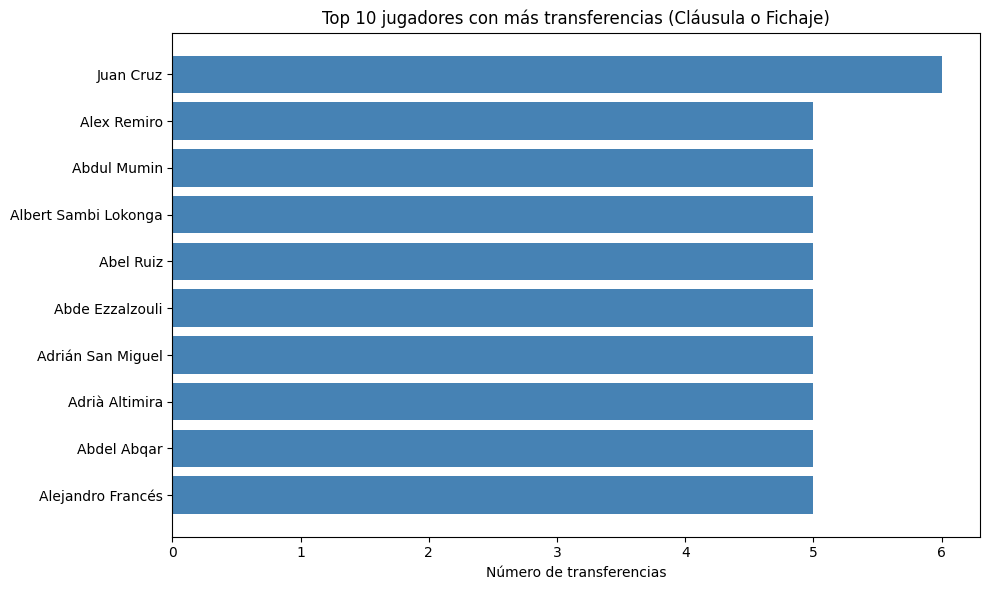

In [ ]:
with conexion_db() as conn:
    query = """
        SELECT 
            nombre,
            apellido,
            COUNT(*) AS total_transferencias
        FROM chavalitos.v_transferencias
        WHERE tipo_operacion IN ('Cláusula', 'Fichaje')
          AND fecha_transferencia BETWEEN '2024-08-15' AND '2025-06-30'
        GROUP BY nombre, apellido
        ORDER BY total_transferencias DESC
        LIMIT 10;
    """
    df_transferencias = pd.read_sql(query, conn)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(
    df_transferencias['nombre'] + ' ' + df_transferencias['apellido'],
    df_transferencias['total_transferencias'],
    color='steelblue'
)
plt.xlabel('Número de transferencias')
plt.title('Top 10 jugadores con más transferencias (Cláusula o Fichaje)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 7. Jugador que más dinero ha movido (top 3)

C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\3805479585.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_podio = pd.read_sql(query, conn)


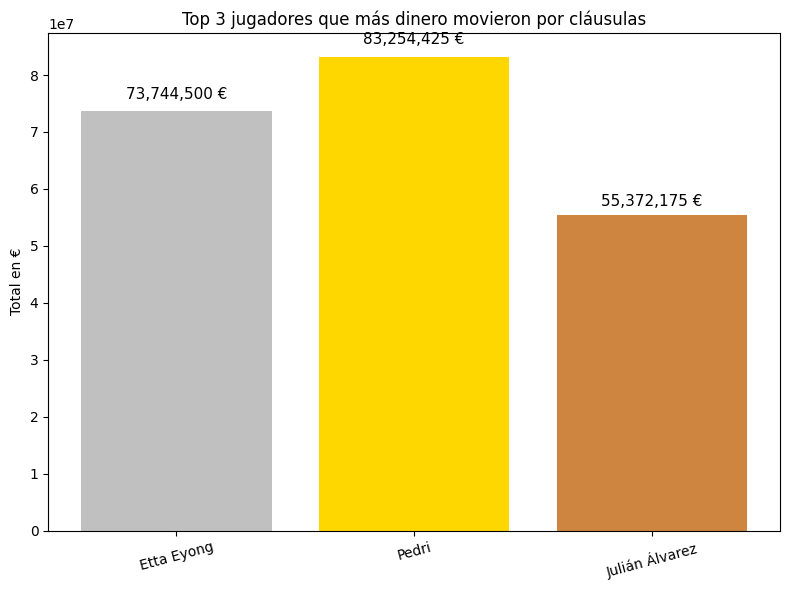

In [ ]:
with conexion_db() as conn:
    query = """
        SELECT 
            nombre,
            apellido,
            SUM(precio) AS total_dinero
        FROM chavalitos.v_transferencias
        WHERE tipo_operacion = 'Cláusula'
          AND temporada = '25/26'
        GROUP BY nombre, apellido
        ORDER BY total_dinero DESC
        LIMIT 3;
    """
    df_podio = pd.read_sql(query, conn)

# Crear columna con nombre completo, asegurando texto
df_podio['jugador'] = (df_podio['nombre'].fillna('') + ' ' + df_podio['apellido'].fillna('')).str.strip()

# Orden para estilo podio
df_podio = df_podio.sort_values('total_dinero', ascending=False).reset_index(drop=True)
df_podio = df_podio.loc[[1, 0, 2]] if len(df_podio) == 3 else df_podio  # solo si hay 3 jugadores

# Convertir a arrays
jugadores = df_podio['jugador'].astype(str).values
valores = df_podio['total_dinero'].astype(float).values

# Gráfico estilo podio
colors = ['silver', 'gold', 'peru']  # 🥈🥇🥉
plt.figure(figsize=(8, 6))
bars = plt.bar(jugadores, valores, color=colors[:len(jugadores)])

# Añadir valores encima
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.02, f"{int(yval):,} €", 
             ha='center', va='bottom', fontsize=11)

plt.title("Top 3 jugadores que más dinero movieron por cláusulas")
plt.ylabel("Total en €")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 7. Jugador que más dinero ha movido (top 5)

C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\11424393.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top5 = pd.read_sql(query, conn)


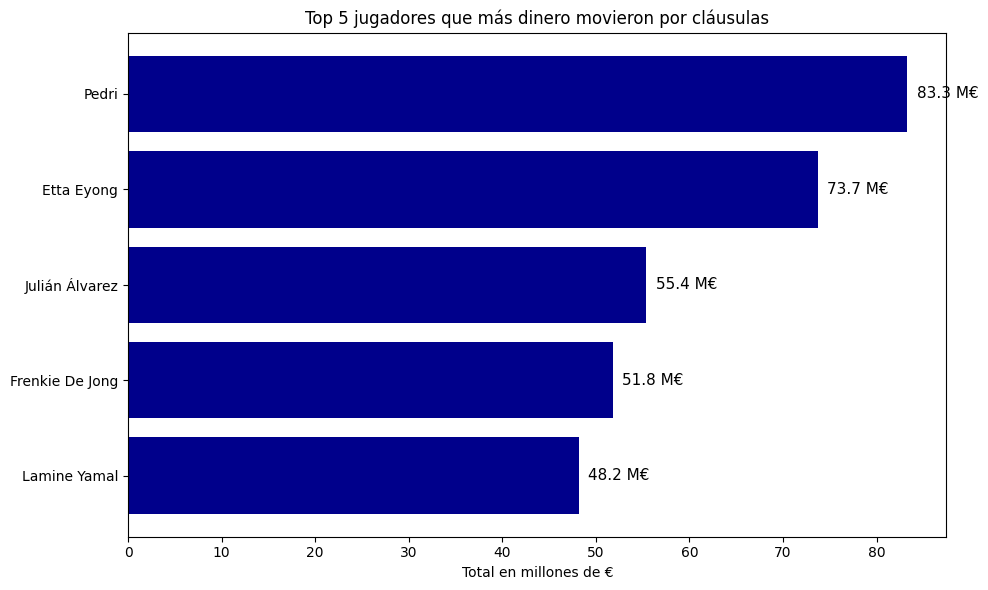

In [9]:
with conexion_db() as conn:
    query = """
        SELECT 
            nombre,
            apellido,
            SUM(precio) AS total_dinero
        FROM chavalitos.v_transferencias
        WHERE tipo_operacion = 'Cláusula'
          AND temporada = '25/26'
        GROUP BY nombre, apellido
        ORDER BY total_dinero DESC
        LIMIT 5;
    """
    df_top5 = pd.read_sql(query, conn)

# Formatear datos
df_top5['jugador'] = (df_top5['nombre'].fillna('') + ' ' + df_top5['apellido'].fillna('')).str.strip()
df_top5['millones'] = (df_top5['total_dinero'] / 1_000_000).round(1)

# Gráfico horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(df_top5['jugador'], df_top5['millones'], color='darkblue')

# Etiquetas a la derecha de las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width:.1f} M€", va='center', fontsize=11)

plt.xlabel("Total en millones de €")
plt.title("Top 5 jugadores que más dinero movieron por cláusulas")
plt.gca().invert_yaxis()  # Poner al más caro arriba
plt.tight_layout()
plt.show()


# 8. Jugadores con mayor beneficio neto

C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\473793728.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_jugadores = pd.read_sql(jugadores_sql, conn)
C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\473793728.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_jornadas = pd.read_sql(jornadas_sql, conn)
C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\473793728.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_once = pd.read_sql(once_ideal_sql, conn)
C:\Users\juan_\AppData\Local\Temp\ipykernel_21752\47

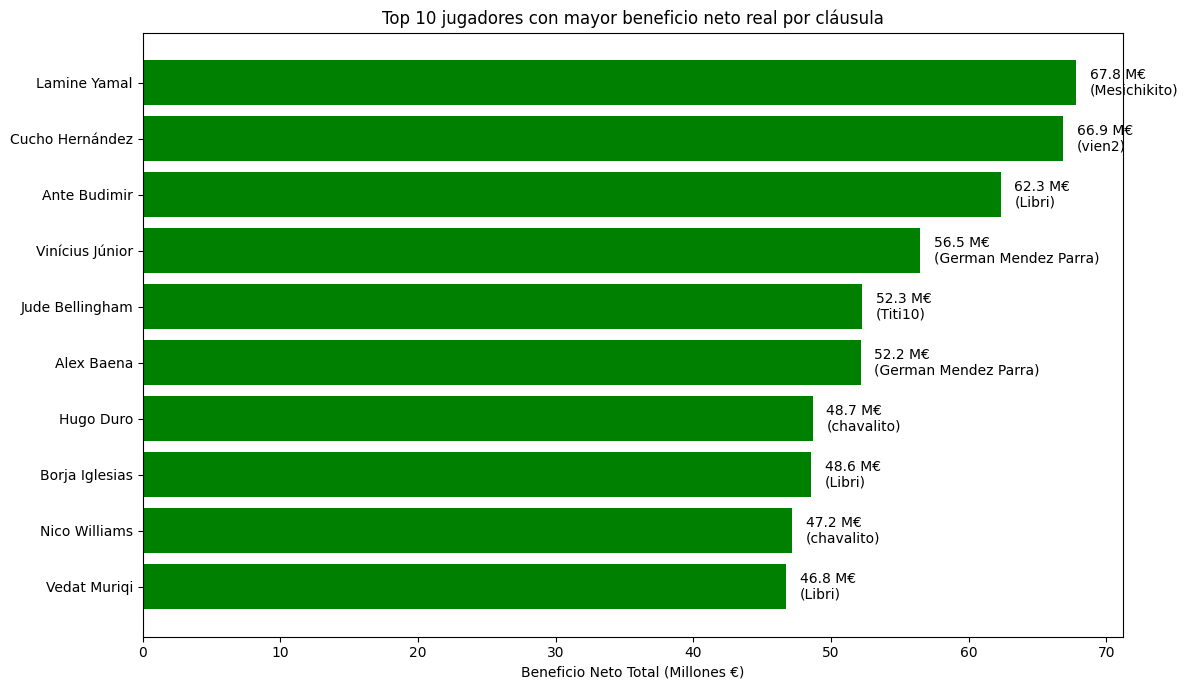

In [10]:
# Bonificaciones (en €)
BONUS_POR_PUNTO = 50000
BONUS_POR_GOL = 1000000
BONUS_POR_JORNADA = 500000
BONUS_ONCE_IDEAL = 500000
BONUS_CLASIFICACION = {
    1: 500000, 2: 600000, 3: 700000, 4: 800000, 5: 900000,
    6: 1000000, 7: 1100000, 8: 1200000, 9: 1300000, 10: 1400000,
    11: 1500000, 12: 1600000, 13: 1700000
}

# 1. Cargar jugadores fichados por cláusula
with conexion_db() as conn:
    jugadores_sql = """
        SELECT id_jugador, nombre, apellido, propietario, fecha, precio, clausula
        FROM chavalitos.v_datos_jugador
        WHERE clausula > precio AND temporada = '25/26'
    """
    df_jugadores = pd.read_sql(jugadores_sql, conn)

    # 2. Datos de rendimiento por jornada
    jornadas_sql = """
        SELECT id_jugador, jornada, puntuacion, eventos
        FROM chavalitos.v_datos_jornadas
        WHERE temporada = '24/25'
    """
    df_jornadas = pd.read_sql(jornadas_sql, conn)
    df_jornadas['goles'] = df_jornadas['eventos'].fillna('').str.count(r'\bgol\b')

    # 3. Once ideal
    once_ideal_sql = """
        SELECT id_jugador, jornada
        FROM chavalitos.v_best_xi_jornadas
        WHERE temporada = '24/25'
    """
    df_once = pd.read_sql(once_ideal_sql, conn)

    # 4. Clasificación por jornada
    clasif_sql = """
        SELECT jornada, usuario, posicion
        FROM chavalitos.v_clasificacion_jornada
        WHERE temporada = '24/25'
    """
    df_clasif = pd.read_sql(clasif_sql, conn)

# 5. Calcular bonificaciones por jugador
resultados = []


for _, row in df_jugadores.iterrows():
    id_jugador = row['id_jugador']
    usuario = row['propietario']
    fecha_fichaje = row['fecha']
    precio = row['precio']
    clausula = row['clausula']
    nombre = (str(row['nombre']) if row['nombre'] else '').strip()
    apellido = (str(row['apellido']) if row['apellido'] else '').strip()
    nombre_completo = f"{nombre} {apellido}".strip()

    # Jornadas del jugador desde su fichaje
    jugador_jornadas = df_jornadas[df_jornadas['id_jugador'] == id_jugador]
    jornadas_disputadas = jugador_jornadas['jornada'].nunique()
    puntos = jugador_jornadas['puntuacion'].sum()
    goles = jugador_jornadas['goles'].sum()

    # Once ideal
    apariciones_once = df_once[df_once['id_jugador'] == id_jugador]['jornada'].nunique()

    # Bonificaciones por clasificación
    clasif_usuario = df_clasif[df_clasif['usuario'] == usuario]
    #bonus_clasificacion = sum(BONUS_CLASIFICACION.get(pos, 0) for pos in clasif_usuario['posicion'])

    # Calcular bonificación total
    bonificacion_total = (
        puntos * BONUS_POR_PUNTO +
        goles * BONUS_POR_GOL +
        jornadas_disputadas * BONUS_POR_JORNADA +
        apariciones_once * BONUS_ONCE_IDEAL 
        #+
        #bonus_clasificacion
    )

    beneficio_neto_total = clausula - precio + bonificacion_total

    resultados.append({
        'jugador': nombre_completo,
        'usuario': usuario,
        'beneficio_neto_total': beneficio_neto_total
    })

# 6. Crear DataFrame final y mostrar top 10
df_resultados = pd.DataFrame(resultados)

top10 = df_resultados.sort_values(by='beneficio_neto_total', ascending=False).head(10)

# 7. Graficar
plt.figure(figsize=(12, 7))
bars = plt.barh(top10['jugador'], top10['beneficio_neto_total'] / 1_000_000, color='green')

for i, bar in enumerate(bars):
    beneficio = top10.iloc[i]['beneficio_neto_total'] / 1_000_000
    usuario = top10.iloc[i]['usuario']
    plt.text(beneficio + 1, bar.get_y() + bar.get_height()/2,
             f"{beneficio:.1f} M€\n({usuario})", va='center', fontsize=10)

plt.xlabel("Beneficio Neto Total (Millones €)")
plt.title("Top 10 jugadores con mayor beneficio neto real por cláusula")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 9. Jugadores con menor beneficio neto

In [2]:
# Bonificaciones (en €)
BONUS_POR_PUNTO = 50000
BONUS_POR_GOL = 1000000
BONUS_POR_JORNADA = 500000
BONUS_ONCE_IDEAL = 500000
BONUS_CLASIFICACION = {
    1: 500000, 2: 600000, 3: 700000, 4: 800000, 5: 900000,
    6: 1000000, 7: 1100000, 8: 1200000, 9: 1300000, 10: 1400000,
    11: 1500000, 12: 1600000, 13: 1700000
}

with conexion_db() as conn:
    # 1. Jugadores fichados por cláusula
    jugadores_sql = """
        SELECT id_jugador, nombre, apellido, propietario, fecha, precio, clausula
        FROM chavalitos.v_datos_jugador
        WHERE clausula > precio AND temporada = '25/26'
    """
    df_jugadores = pd.read_sql(jugadores_sql, conn)
    df_jugadores['fecha'] = pd.to_datetime(df_jugadores['fecha'])


    # 2. Datos de jornada + fechas
    jornadas_sql = """
        SELECT id_jugador, jornada, puntuacion, eventos, f_carga::date as fecha_jornada
        FROM chavalitos.v_datos_jornadas
        WHERE temporada = '24/25'
    """
    df_jornadas = pd.read_sql(jornadas_sql, conn)
    df_jornadas['goles'] = df_jornadas['eventos'].fillna('').str.count(r'\bgol\b')
    df_jornadas['fecha_jornada'] = pd.to_datetime(df_jornadas['fecha_jornada'])


    # 3. Once ideal
    once_ideal_sql = """
        SELECT id_jugador, jornada
        FROM chavalitos.v_best_xi_jornadas
        WHERE temporada = '24/25'
    """
    df_once = pd.read_sql(once_ideal_sql, conn)
    df_once['jornada'] = df_once['jornada'].str.extract(r'(\d+)').astype(int)


    # 4. Clasificación por jornada
    clasif_sql = """
        SELECT jornada, usuario, posicion
        FROM chavalitos.v_clasificacion_jornada
        WHERE temporada = '24/25'
    """
    df_clasif = pd.read_sql(clasif_sql, conn)
    df_clasif['jornada'] = df_clasif['jornada'].astype(int)


# Mapeo jornada ↔ fecha mínima para filtrar correctamente
jornada_fecha_map = (
    df_jornadas[['jornada', 'fecha_jornada']]
    .dropna()
    .groupby('jornada')['fecha_jornada']
    .min()
    .to_dict()
)

# 5. Calcular bonificaciones reales por jugador
resultados = []
print(f"Número de jugadores fichados por cláusula: {len(df_jugadores)}")

for _, row in df_jugadores.iterrows():
    id_jugador = row['id_jugador']
    usuario = row['propietario']
    fecha_fichaje = row['fecha']
    precio = row['precio']
    clausula = row['clausula']
    nombre = (str(row['nombre']) if row['nombre'] else '').strip()
    apellido = (str(row['apellido']) if row['apellido'] else '').strip()
    nombre_completo = f"{nombre} {apellido}".strip()

    # Determinar desde qué jornada contar (la primera con fecha igual o posterior al fichaje)
    jornada_fichaje = min(
        (j for j, f in jornada_fecha_map.items() if f >= fecha_fichaje),
        default=None
    )
    if jornada_fichaje is None:
        continue  # No hay jornadas posteriores al fichaje

    # --- Jornadas jugadas por el jugador desde el fichaje ---
    jugador_jornadas = df_jornadas[
        (df_jornadas['id_jugador'] == id_jugador) &
        (df_jornadas['jornada'] >= jornada_fichaje)
    ]
    jornadas_disputadas = jugador_jornadas['jornada'].nunique()
    puntos = jugador_jornadas['puntuacion'].sum()
    goles = jugador_jornadas['goles'].sum()

    # --- Apariciones en once ideal desde esa jornada ---
    apariciones_once = df_once[
        (df_once['id_jugador'] == id_jugador) &
        (df_once['jornada'] >= jornada_fichaje)
    ]['jornada'].nunique()

    # --- Clasificaciones del usuario desde esa jornada ---
    clasif_usuario = df_clasif[
        (df_clasif['usuario'] == usuario) &
        (df_clasif['jornada'] >= jornada_fichaje)
    ]
    bonus_clasificacion = sum(
        BONUS_CLASIFICACION.get(pos, 0) for pos in clasif_usuario['posicion']
    )

    # Calcular bonificación total
    bonificacion_total = (
        puntos * BONUS_POR_PUNTO +
        goles * BONUS_POR_GOL +
        jornadas_disputadas * BONUS_POR_JORNADA +
        apariciones_once * BONUS_ONCE_IDEAL +
        bonus_clasificacion
    )

    beneficio_neto_total = clausula - precio + bonificacion_total

    resultados.append({
        'jugador': nombre_completo,
        'usuario': usuario,
        'beneficio_neto_total': beneficio_neto_total
    })

# 6. Crear DataFrame final y graficar bottom 10
df_resultados = pd.DataFrame(resultados)

bottom10 = df_resultados.sort_values(by='beneficio_neto_total', ascending=True).head(10)

plt.figure(figsize=(12, 7))
bars = plt.barh(bottom10['jugador'], bottom10['beneficio_neto_total'] / 1_000_000, color='red')

for i, bar in enumerate(bars):
    beneficio = bottom10.iloc[i]['beneficio_neto_total'] / 1_000_000
    usuario = bottom10.iloc[i]['usuario']
    plt.text(beneficio + 1, bar.get_y() + bar.get_height()/2,
             f"{beneficio:.1f} M€\n({usuario})", va='center', fontsize=10)

plt.xlabel("Beneficio Neto Total (Millones €)")
plt.title("Top 10 jugadores con menor beneficio neto real por cláusula (ajustado a fecha de fichaje)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\354079469.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_jugadores = pd.read_sql(jugadores_sql, conn)
C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\354079469.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_jornadas = pd.read_sql(jornadas_sql, conn)
C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\354079469.py:40: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_once = pd.read_sql(once_ideal_sql, conn)
C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\35

Número de jugadores fichados por cláusula: 140


KeyError: 'beneficio_neto_total'

# 10. Jugador con el clasulazo más alto

In [3]:
with conexion_db() as conn:
    clausulazo_sql = """
        SELECT 
    a.nombre,
    a.apellido,
    a.usuario_destino AS propietario,
    a.fecha_transferencia,
    a.precio,
    b.clausula,
    b.valor
FROM chavalitos.v_transferencias a
JOIN chavalitos.v_datos_jugador b
    ON a.id_jugador = b.id_jugador
WHERE a.tipo_operacion = 'Cláusula'
  AND a.temporada = '25/26'
ORDER BY a.precio DESC
LIMIT 1;
    """
    df_clausulazo = pd.read_sql(clausulazo_sql, conn)

# Mostrar el resultado
jugador = df_clausulazo.iloc[0]
print(f"💥 Clausulazo más alto:")
print(f"- Jugador: {jugador['nombre']} {jugador['apellido']}")
print(f"- Usuario: {jugador['propietario']}")
print(f"- Fecha: {jugador['fecha_transferencia']}")
print(f"- Precio pagado: {jugador['precio']:,.0f} €")
print(f"- Valor: {jugador['valor']:,.0f} €")
print(f"- Cláusula actual: {jugador['clausula']:,.0f} €")
print(f"- Diferencia (beneficio bruto): {jugador['clausula'] - jugador['precio']:,.0f} €")


💥 Clausulazo más alto:
- Jugador: Julián Álvarez
- Usuario: vien2
- Fecha: 2025-10-02
- Precio pagado: 55,372,175 €
- Valor: 21,003,000 €
- Cláusula actual: 80,755,020 €
- Diferencia (beneficio bruto): 25,382,845 €


C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\1763008566.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_clausulazo = pd.read_sql(clausulazo_sql, conn)


# 11. Jugadore TOP en cada estadística

In [4]:
with conexion_db() as conn:
    query = """
        SELECT *
        FROM chavalitos.v_datos_jornadas
        WHERE temporada = '25/26'
    """
    df = pd.read_sql(query, conn)

# Lista de columnas que NO se deben analizar
no_relevantes = [
    'nombre', 'apellido', 'jornada', 'eventos', 'sancionolesion', 'temporada',
    'f_carga', 'id_jugador'
]

# Filtramos columnas numéricas relevantes
estadisticas_numericas = [
    col for col in df.columns
    if col not in no_relevantes and pd.api.types.is_numeric_dtype(df[col])
]

# DataFrame para almacenar los mejores en cada estadística
mejores = []

for col in estadisticas_numericas:
    max_idx = df[col].idxmax()
    fila = df.loc[max_idx]
    mejores.append({
        'estadística': col,
        'valor': fila[col],
        'jugador': f"{fila['nombre']} {fila['apellido']}".strip(),
        'jornada': fila['jornada']
    })

df_mejores = pd.DataFrame(mejores).sort_values(by='estadística')
# Mostrar en consola
display(df_mejores)


C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\376455670.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,estadística,valor,jugador,jornada
5,asistencias_de_gol,2.0,Luis Milla,2
30,asistencias_esperadas,1.1,Josán Fernández,7
4,balones_en_largo_precisos,17.0,Aarón Escandell,1
3,balones_en_largo_totales,36.0,Matías Dituro,2
7,centros_precisos,7.0,Sergio Gómez,4
6,centros_totales,15.0,Sergio Gómez,4
21,despejes_por_alto,6.0,Julen Agirrezabala,6
20,despejes_totales,18.0,Natan Souza,8
10,duelos_aereos_ganados,11.0,Vedat Muriqi,4
11,duelos_aereos_perdidos,11.0,Roberto Fernández,2


# 12. Evolución puntuación de jornadas por usuario

In [ ]:
with conexion_db() as conn:
    query = """
        SELECT jornada, usuario, puntos
        FROM chavalitos.v_clasificacion_jornada
        WHERE temporada = '24/25'
    """
    df = pd.read_sql(query, conn)

# 2. Asegurar tipos
df['jornada'] = df['jornada'].astype(int)
df['puntos'] = df['puntos'].astype(int)

# 3. Crear gráfico interactivo de líneas
fig = px.line(
    df,
    x="jornada",
    y="puntos",
    color="usuario",
    markers=True,
    title="📈 Evolución de puntuaciones por jornada (Liga Mister)",
    labels={"jornada": "Jornada", "puntos": "Puntos", "usuario": "Usuario"},
    template="plotly_white"
)

# 4. Personalización: colores + visuales
fig.update_traces(line=dict(width=2))  # grosor de línea
fig.update_layout(
    hovermode="x unified",
    legend_title_text="Usuarios",
    width=1200,
    height=700,
    font=dict(size=14),
    margin=dict(t=80, b=40, r=10, l=10)
)

# 5. Exportar a HTML
fig.write_html("grafico_puntos_por_jornada.html")

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\2529419267.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



# 13. Puntuaciones acumuladas por usuarios

C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\547446871.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\547446871.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20', num_usuarios)
C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\547446871.py:39: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\juan_\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_

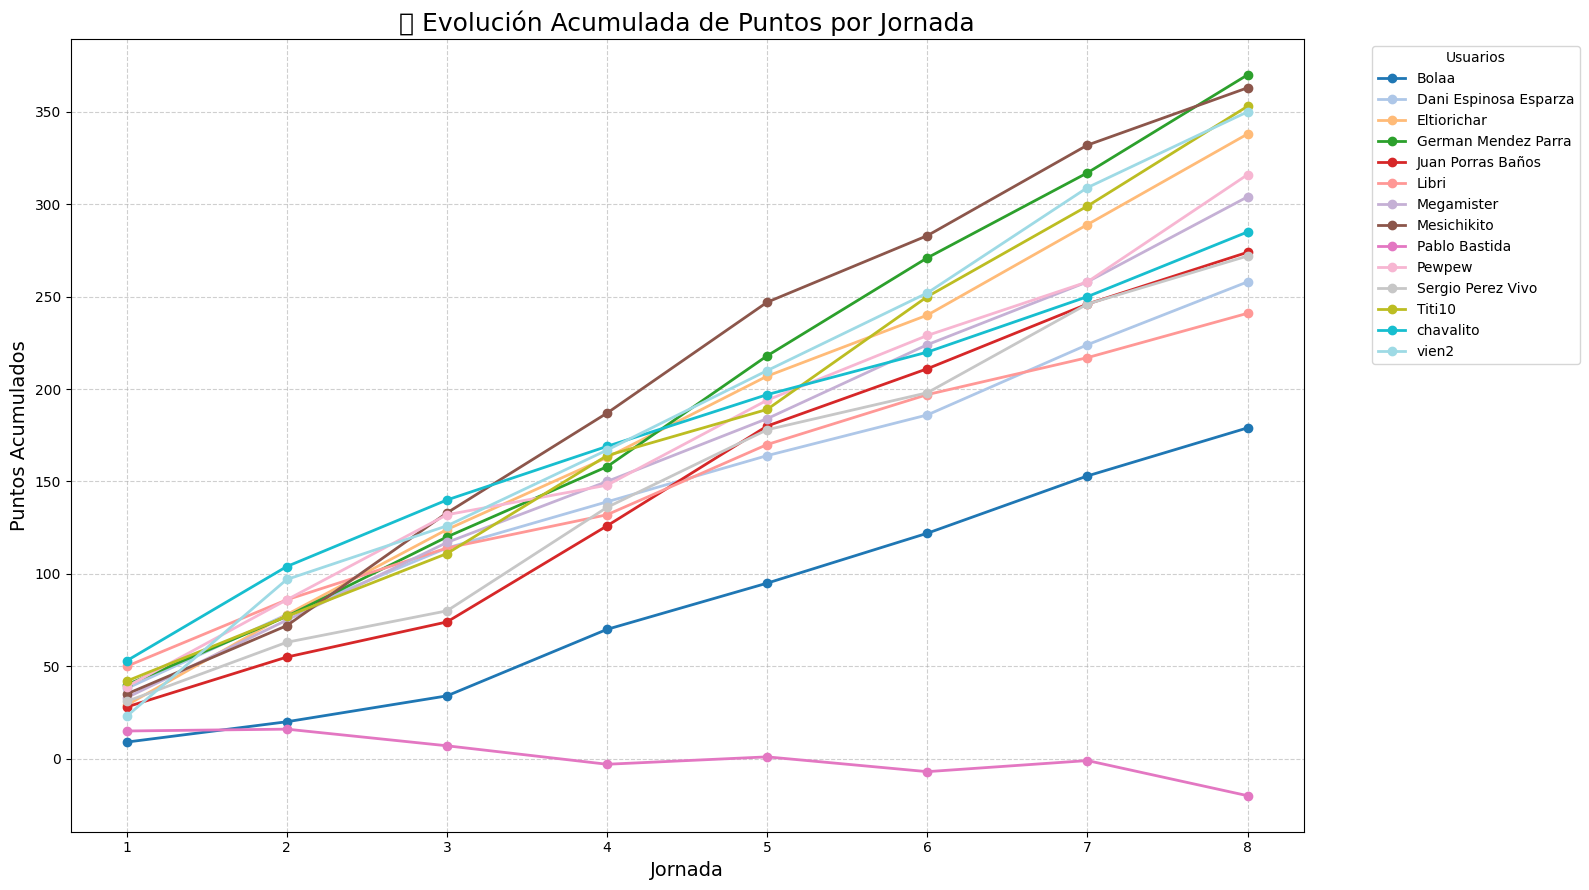

In [5]:
with conexion_db() as conn:
    query = """
        SELECT jornada, usuario, puntos
        FROM chavalitos.v_clasificacion_jornada
        WHERE temporada = '25/26'
    """
    df = pd.read_sql(query, conn)

# 2. Asegurar tipos correctos
df['jornada'] = df['jornada'].astype(int)
df['puntos'] = df['puntos'].astype(int)

# 3. Ordenar por usuario y jornada
df = df.sort_values(by=['usuario', 'jornada'])

# 4. Calcular puntos acumulados por usuario
df['puntos_acumulados'] = df.groupby('usuario')['puntos'].cumsum()

# 5. Pivot para líneas por usuario
pivot_df = df.pivot(index='jornada', columns='usuario', values='puntos_acumulados')
usuarios = pivot_df.columns
num_usuarios = len(usuarios)

# 6. Crear colores únicos por usuario
colormap = cm.get_cmap('tab20', num_usuarios)
colors = [colormap(i) for i in range(num_usuarios)]

# 7. Graficar
plt.figure(figsize=(16, 9))

for i, usuario in enumerate(usuarios):
    plt.plot(pivot_df.index, pivot_df[usuario], label=usuario, marker='o', linewidth=2, color=colors[i])

plt.title("📈 Evolución Acumulada de Puntos por Jornada", fontsize=18)
plt.xlabel("Jornada", fontsize=14)
plt.ylabel("Puntos Acumulados", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Usuarios", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 14. Radar chart ofensivo vs defensivo para un jugador

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\1521264371.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



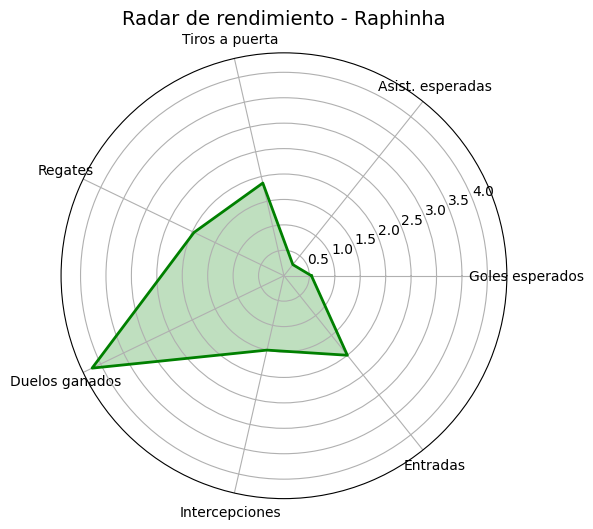

In [ ]:
jugador_objetivo = "Raphinha"

with conexion_db() as conn:
    query = f"""
        SELECT *
        FROM chavalitos.v_datos_jornadas
        WHERE temporada = '24/25'
          AND (apellido = '{jugador_objetivo}' OR CONCAT(COALESCE(nombre, ''), ' ', COALESCE(apellido, '')) = '{jugador_objetivo}')
    """
    df = pd.read_sql(query, conn)

# Asegurar que hay datos
if df.empty:
    print(f"No se encontraron registros para {jugador_objetivo}")
else:
    # Campos a incluir en el radar
    stats = {
        'Goles esperados': 'goles_esperados',
        'Asist. esperadas': 'asistencias_esperadas',
        'Tiros a puerta': 'tiros_a_puerta',
        'Regates': 'regates_completados',
        'Duelos ganados': 'duelos_ganados',
        'Intercepciones': 'intercepciones',
        'Entradas': 'entradas_totales'
    }

    # Calcular promedio por estadística
    valores = [df[col].mean() for col in stats.values()]
    labels = list(stats.keys())

    # Preparar radar chart
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    valores += valores[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, valores, color='green', linewidth=2)
    ax.fill(angles, valores, color='green', alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)

    # Construir nombre completo para título
    nombre_titulo = f"{df['nombre'].iloc[0] or ''} {df['apellido'].iloc[0]}".strip()
    ax.set_title(f"Radar de rendimiento - {nombre_titulo}", size=14)

    plt.tight_layout()
    plt.show()

# 15. Ranking de regularidad (mejor media puntuación)

In [6]:
with conexion_db() as conn:
    query = """
        SELECT 
            j.id_jugador,
            j.nombre,
            j.apellido,
            g.propietario,
            AVG(j.puntuacion) AS media_puntos,
            COUNT(*) AS partidos
        FROM chavalitos.v_datos_jornadas j
        JOIN chavalitos.v_datos_jugador g ON j.id_jugador = g.id_jugador
        WHERE j.temporada = '25/26' AND j.puntuacion IS NOT NULL
        GROUP BY j.id_jugador, j.nombre, j.apellido, g.propietario
        HAVING COUNT(*) >= 5
        ORDER BY media_puntos DESC
        LIMIT 10
    """
    df_regularidad = pd.read_sql(query, conn)

# Construir nombre completo
df_regularidad['jugador'] = (df_regularidad['nombre'].fillna('') + ' ' + df_regularidad['apellido'].fillna('')).str.strip()

# Ordenar columnas
df_regularidad = df_regularidad[['jugador', 'propietario', 'media_puntos', 'partidos']]

# Mostrar bonito
print(df_regularidad.to_string(index=False))


        jugador         propietario  media_puntos  partidos
  Kylian Mbappé       Jugador libre     10.750000         8
  Kylian Mbappé               vien2     10.750000         8
          Pedri               Libri      8.625000         8
          Pedri              Top 17      8.625000         8
  Ferran Torres               vien2      7.857143         7
  Ferran Torres        Sobrecarga ·      7.857143         7
     Etta Eyong         Mesichikito      7.625000         8
Vinícius Júnior              Titi10      7.500000         8
Vinícius Júnior German Mendez Parra      7.500000         8
 Julián Álvarez              Top 23      7.250000         8


C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\1165656009.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_regularidad = pd.read_sql(query, conn)


# 16. Mejor jornada de cada jugador

In [7]:
with conexion_db() as conn:
    query = """
        SELECT nombre, apellido, jornada, puntuacion
        FROM chavalitos.v_datos_jornadas
        WHERE temporada = '25/26'
        and sancionolesion not in ('No jugó la jornada', 'No convocado')
    """
    df = pd.read_sql(query, conn)

df['jugador'] = (df['nombre'].fillna('') + ' ' + df['apellido'].fillna('')).str.strip()
mejor_jornada = df.sort_values(['jugador', 'puntuacion'], ascending=[True, False])
mejor_jornada = mejor_jornada.drop_duplicates('jugador')

print(mejor_jornada[['jugador', 'jornada', 'puntuacion']].sort_values(by='puntuacion', ascending=False).head(10))


             jugador  jornada  puntuacion
30   Abde Ezzalzouli        1           0
104      Pau Cabanes        3           0
147   Orri Óskarsson        4           0
241   Omar Mascarell        7           0
17      Oihan Sancet        1           0
97       Nobel Mendy        3           0
132     Nikola Maraš        2           0
137    Nico Williams        4           0
45     Nelson Deossa        2           0
235      Nacho Vidal        7           0


C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\2300834391.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


# 17. Jugador con más apariciones en el once ideal

In [8]:
with conexion_db() as conn:
    query = """
        SELECT id_jugador, nombre, COUNT(*) as veces_en_once
        FROM chavalitos.v_best_xi_jornadas
        WHERE temporada = '25/26'
        GROUP BY id_jugador, nombre
        ORDER BY veces_en_once DESC
        LIMIT 10
    """
    df_once = pd.read_sql(query, conn)

print(df_once)


   id_jugador          nombre  veces_en_once
0       58954       K. Mbappé              5
1       52375        L. Yamal              3
2       12900       V. Júnior              3
3       27333       E. García              3
4       48684  R. Lewandowski              2
5       28777      C. Álvarez              2
6         611    A. Escandell              2
7       22547           Pedri              2
8       29166       J. Garcia              2
9       59476      J. Álvarez              2


C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\3507347032.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_once = pd.read_sql(query, conn)


# 18. Eficiencia goleadora (goles / tiros a puerta)

In [ ]:
with conexion_db() as conn:
    query = """
        SELECT id_jugador, nombre, apellido, eventos, tiros_a_puerta
        FROM chavalitos.v_datos_jornadas
        WHERE temporada = '24/25' AND tiros_a_puerta IS NOT NULL
    """
    df = pd.read_sql(query, conn)

# Extraer goles desde la columna 'eventos'
df['goles'] = df['eventos'].fillna('').str.count(r'\bgol\b')
df['jugador'] = (df['nombre'].fillna('') + ' ' + df['apellido'].fillna('')).str.strip()

# Agrupar por jugador
agrupado = df.groupby(['id_jugador', 'jugador']).agg({
    'goles': 'sum',
    'tiros_a_puerta': 'sum',
    'eventos': 'count'  # para saber cuántas jornadas tiene
}).reset_index()

# Filtrar con mínimo de tiros a puerta para ser relevante
agrupado = agrupado[agrupado['tiros_a_puerta'] >= 5]

# Calcular eficiencia
agrupado['eficiencia'] = agrupado['goles'] / agrupado['tiros_a_puerta']

# Ordenar
eficientes = agrupado.sort_values(by='eficiencia', ascending=False).head(10)

# Mostrar
print(eficientes[['jugador', 'goles', 'tiros_a_puerta', 'eficiencia']].to_string(index=False))


          jugador  goles  tiros_a_puerta  eficiencia
   Juanlu Sánchez      4               5    0.800000
    Daniel Vivian      4               5    0.800000
Roberto Fernández      6               8    0.750000
       Umar Sadiq      5               7    0.714286
       Pathé Ciss      4               6    0.666667
  Leandro Cabrera      4               6    0.666667
      Ayoze Pérez     19              31    0.612903
   Martin Valjent      3               5    0.600000
   Seydouba Cisse      3               5    0.600000
       Álex Muñoz      3               5    0.600000


C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\1456666644.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



# 19. Efectividad total de tiro

In [ ]:
with conexion_db() as conn:
    query = """
        SELECT id_jugador, nombre, apellido, eventos, tiros_a_puerta, tiros_fuera
        FROM chavalitos.v_datos_jornadas
        WHERE temporada = '24/25'
          AND (tiros_a_puerta IS NOT NULL OR tiros_fuera IS NOT NULL)
    """
    df = pd.read_sql(query, conn)

# Calcular goles desde eventos
df['goles'] = df['eventos'].fillna('').str.count(r'\bgol\b')
df['jugador'] = (df['nombre'].fillna('') + ' ' + df['apellido'].fillna('')).str.strip()

# Reemplazar NaN por 0 para suma de tiros
df['tiros_a_puerta'] = df['tiros_a_puerta'].fillna(0)
df['tiros_fuera'] = df['tiros_fuera'].fillna(0)

# Agrupar por jugador
agrupado = df.groupby(['id_jugador', 'jugador']).agg({
    'goles': 'sum',
    'tiros_a_puerta': 'sum',
    'tiros_fuera': 'sum'
}).reset_index()

# Calcular total de tiros y eficiencia
agrupado['tiros_totales'] = agrupado['tiros_a_puerta'] + agrupado['tiros_fuera']
agrupado = agrupado[agrupado['tiros_totales'] >= 5]  # mínimo de tiros para ser relevante
agrupado['efectividad_total'] = agrupado['goles'] / agrupado['tiros_totales']

# Ordenar
ranking = agrupado.sort_values(by='efectividad_total', ascending=False).head(10)

# Mostrar
print(ranking[['jugador', 'goles', 'tiros_totales', 'efectividad_total']].to_string(index=False))


          jugador  goles  tiros_totales  efectividad_total
    Aitor Paredes      3            5.0           0.600000
      Pablo Torre      3            6.0           0.500000
Roberto Fernández      6           13.0           0.461538
   Juanlu Sánchez      4           10.0           0.400000
       Álex Muñoz      3            8.0           0.375000
     Rubén García      5           14.0           0.357143
   Martin Valjent      3            9.0           0.333333
       Pere Milla      2            6.0           0.333333
      Ayoze Pérez     19           57.0           0.333333
 Javier Rodríguez      3            9.0           0.333333

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\2852531100.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



# 20. Evolución valor equipo

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\1507975526.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\1507975526.py:19: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\1507975526.py:33: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from current font.

C:\Users\juan_\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from current font.



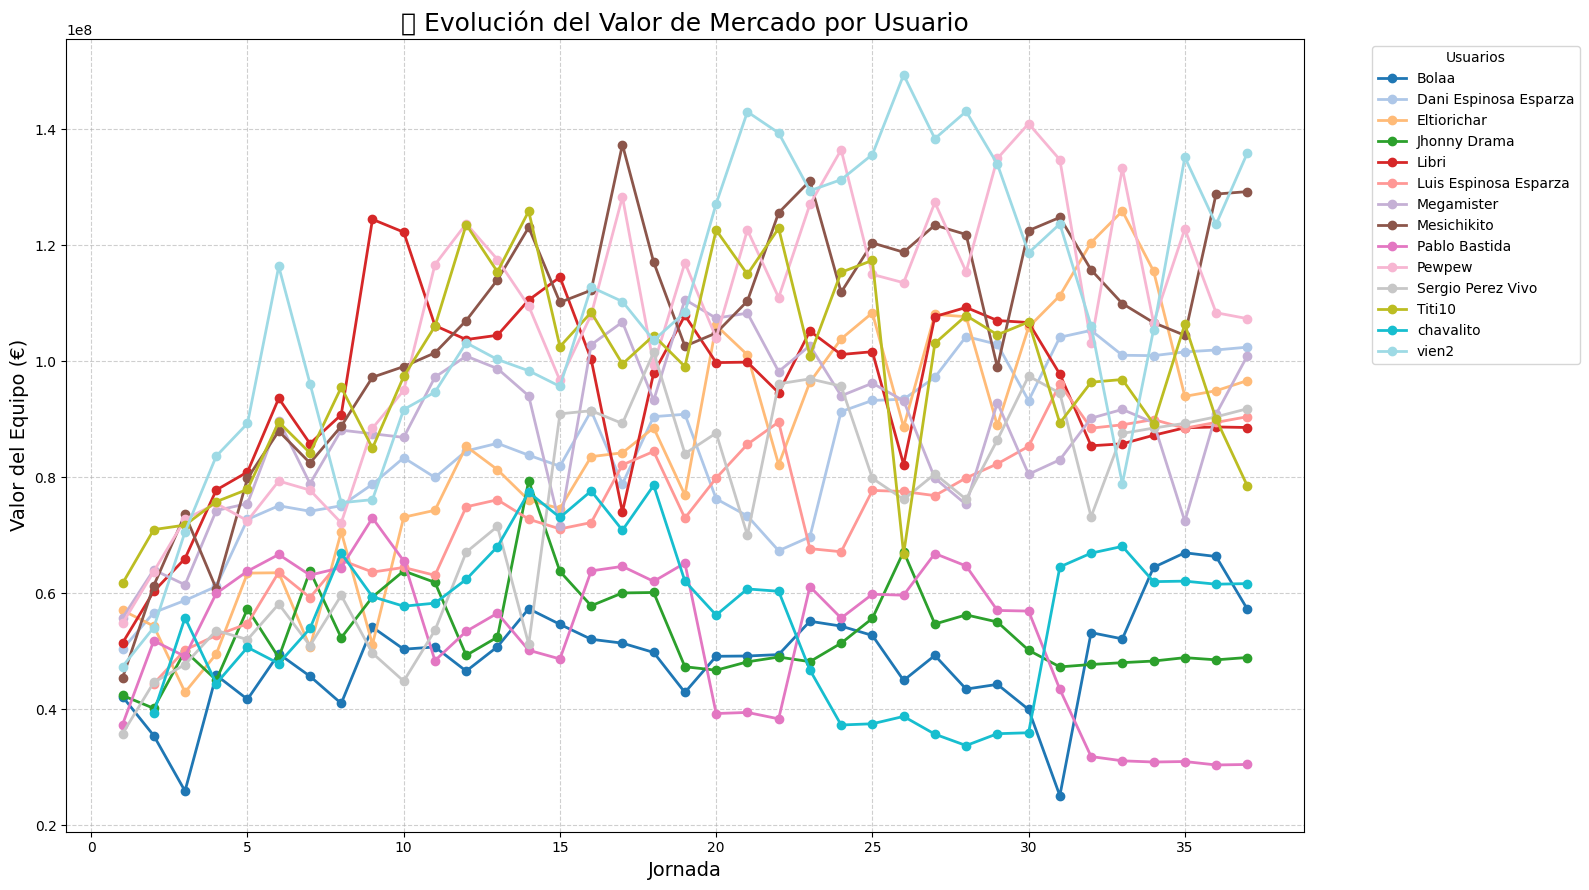

In [ ]:
with conexion_db() as conn:
    query = """
        SELECT jornada, usuario, valor_equipo
        FROM chavalitos.v_clasificacion_jornada
        WHERE temporada = '24/25'
    """
    df = pd.read_sql(query, conn)

# 2. Convertir tipos
df['jornada'] = df['jornada'].astype(int)
df['valor_equipo'] = df['valor_equipo'].astype(float)

# 3. Pivot para líneas por usuario
pivot_df = df.pivot(index='jornada', columns='usuario', values='valor_equipo')
usuarios = pivot_df.columns
num_usuarios = len(usuarios)

# 4. Colores únicos por usuario
colormap = cm.get_cmap('tab20', num_usuarios)
colors = [colormap(i) for i in range(num_usuarios)]

# 5. Graficar
plt.figure(figsize=(16, 9))

for i, usuario in enumerate(usuarios):
    plt.plot(pivot_df.index, pivot_df[usuario], label=usuario, marker='o', linewidth=2, color=colors[i])

plt.title("💸 Evolución del Valor de Mercado por Usuario", fontsize=18)
plt.xlabel("Jornada", fontsize=14)
plt.ylabel("Valor del Equipo (€)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Usuarios", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 21. ¿Quién ha terminado más veces primero?

In [9]:
with conexion_db() as conn:
    query = """
        SELECT usuario, COUNT(*) AS veces_primero
        FROM chavalitos.v_clasificacion_jornada
        WHERE temporada = '25/26' AND posicion = 1
        GROUP BY usuario
        ORDER BY veces_primero DESC
    """
    df = pd.read_sql(query, conn)

print(df.to_string(index=False))


          usuario  veces_primero
      Mesichikito              2
            vien2              2
        chavalito              1
           Pewpew              1
Sergio Perez Vivo              1
           Titi10              1


C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\2876773579.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


# 22. Mayor media de puntos por jornada

In [ ]:
with conexion_db() as conn:
    query = """
        SELECT usuario, AVG(puntos) AS media_puntos, COUNT(*) AS jornadas
        FROM chavalitos.v_clasificacion_jornada
        WHERE temporada = '24/25'
        GROUP BY usuario
        HAVING COUNT(*) >= 5
        ORDER BY media_puntos DESC
    """
    df = pd.read_sql(query, conn)

print(df.to_string(index=False))


              usuario  media_puntos  jornadas
                vien2     51.918919        37
          Mesichikito     49.756757        37
               Pewpew     48.972973        37
           Megamister     45.297297        37
               Titi10     43.297297        37
          Eltiorichar     42.000000        37
                Libri     41.648649        37
Dani Espinosa Esparza     41.540541        37
    Sergio Perez Vivo     40.459459        37
Luis Espinosa Esparza     40.333333        36
            chavalito     32.833333        36
         Jhonny Drama     32.621622        37
                Bolaa     31.621622        37
        Pablo Bastida     23.675676        37


C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\2891315632.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



# 23. Mejor jornada

In [ ]:
with conexion_db() as conn:
    query = """
        SELECT usuario, jornada, puntos
        FROM chavalitos.v_clasificacion_jornada
        WHERE temporada = '24/25'
        ORDER BY puntos DESC
        LIMIT 1
    """
    df = pd.read_sql(query, conn)

print(df.to_string(index=False))


usuario  jornada  puntos
  vien2       29      77


C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\2668635103.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



# 24. Peor jornada

In [ ]:
with conexion_db() as conn:
    query = """
        SELECT usuario, jornada, puntos
        FROM chavalitos.v_clasificacion_jornada
        WHERE temporada = '24/25'
        ORDER BY puntos asc
        LIMIT 1
    """
    df = pd.read_sql(query, conn)

print(df.to_string(index=False))


C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\3951790482.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



      usuario  jornada  puntos
Pablo Bastida       34      -9


# 25. Relación entre puntos y valor del equipo

C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\3533344760.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
c:\Users\juan_\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\juan_\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


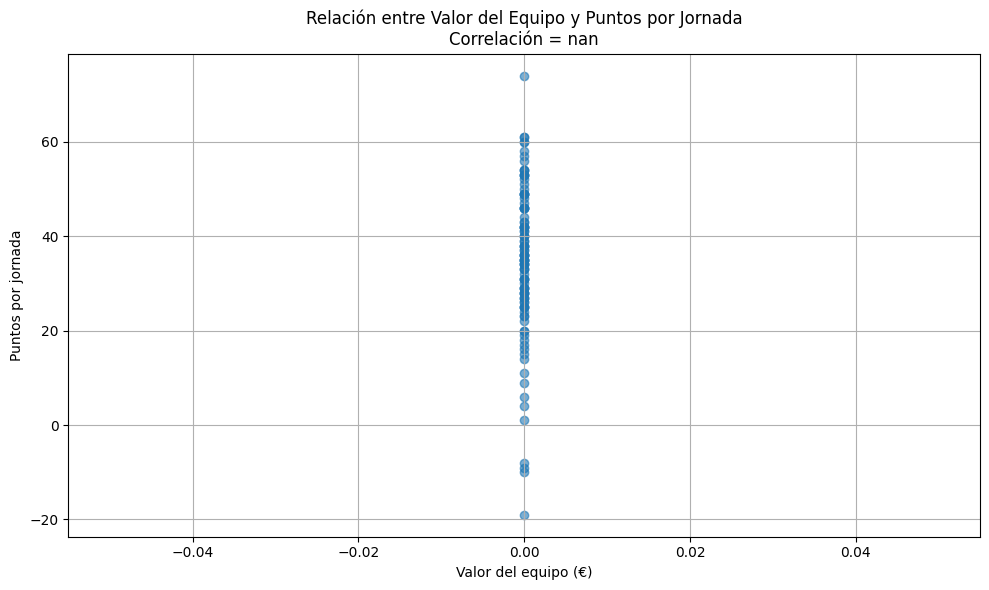

In [10]:
with conexion_db() as conn:
    query = """
        SELECT usuario, puntos, valor_equipo
        FROM chavalitos.v_clasificacion_jornada
        WHERE temporada = '25/26'
    """
    df = pd.read_sql(query, conn)

# Asegurar tipos correctos
df['valor_equipo'] = df['valor_equipo'].astype(float)

# Calcular correlación
correlacion = df['puntos'].corr(df['valor_equipo'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="valor_equipo", y="puntos", scatter_kws={'alpha': 0.6})
plt.title(f"Relación entre Valor del Equipo y Puntos por Jornada\nCorrelación = {correlacion:.2f}")
plt.xlabel("Valor del equipo (€)")
plt.ylabel("Puntos por jornada")
plt.grid(True)
plt.tight_layout()
plt.show()

# 26. Usuarios con más ganancias y pérdidas en cláusulas

In [11]:
def formatear_millones(valor):
    return f"{valor / 1_000_000:,.1f} M€".replace(",", ".")

with conexion_db() as conn:
    query = """
        SELECT tipo_operacion, usuario_origen, usuario_destino, precio
        FROM chavalitos.v_transferencias
        WHERE tipo_operacion = 'Cláusula'
          AND temporada = '25/26'
    """
    df = pd.read_sql(query, conn)

# Sumar lo ganado y perdido por usuario
ganado = df.groupby('usuario_origen')['precio'].sum().reset_index(name='ganado')
perdido = df.groupby('usuario_destino')['precio'].sum().reset_index(name='perdido')

# Unir por usuario
balance = pd.merge(ganado, perdido, left_on='usuario_origen', right_on='usuario_destino', how='outer')
balance['usuario'] = balance['usuario_origen'].combine_first(balance['usuario_destino'])
balance = balance.fillna(0)

# Calcular balance neto
balance['balance_clausulas'] = balance['ganado'] - balance['perdido']

# Seleccionar columnas y ordenar
balance_final = balance[['usuario', 'ganado', 'perdido', 'balance_clausulas']].sort_values(by='balance_clausulas', ascending=False)

# Formatear columnas en millones
for col in ['ganado', 'perdido', 'balance_clausulas']:
    balance_final[col] = balance_final[col].apply(formatear_millones)

# Mostrar resultados
print("🟢 Usuarios que más ganaron en cláusulas:\n")
print(balance_final.head(5).to_string(index=False))

print("\n🔴 Usuarios que más perdieron en cláusulas:\n")
print(balance_final.tail(5).sort_values(by='balance_clausulas').to_string(index=False))

🟢 Usuarios que más ganaron en cláusulas:

              usuario   ganado  perdido balance_clausulas
               Pewpew  87.9 M€   1.0 M€           86.9 M€
               Titi10 224.5 M€ 146.2 M€           78.3 M€
            chavalito  65.7 M€  25.7 M€           40.1 M€
        Pablo Bastida  26.1 M€   0.0 M€           26.1 M€
Dani Espinosa Esparza  81.4 M€  56.1 M€           25.2 M€

🔴 Usuarios que más perdieron en cláusulas:

            usuario   ganado  perdido balance_clausulas
  Juan Porras Baños 105.9 M€ 245.0 M€         -139.1 M€
         Megamister  98.2 M€ 123.5 M€          -25.3 M€
German Mendez Parra 226.9 M€ 256.6 M€          -29.7 M€
        Mesichikito 109.1 M€ 146.8 M€          -37.7 M€
              Libri  23.0 M€  67.5 M€          -44.6 M€


C:\Users\juan_\AppData\Local\Temp\ipykernel_23120\301826655.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


# 27. Mejor 11

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\2037078629.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\juan_\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9917 (\N{SOCCER BALL}) missing from current font.



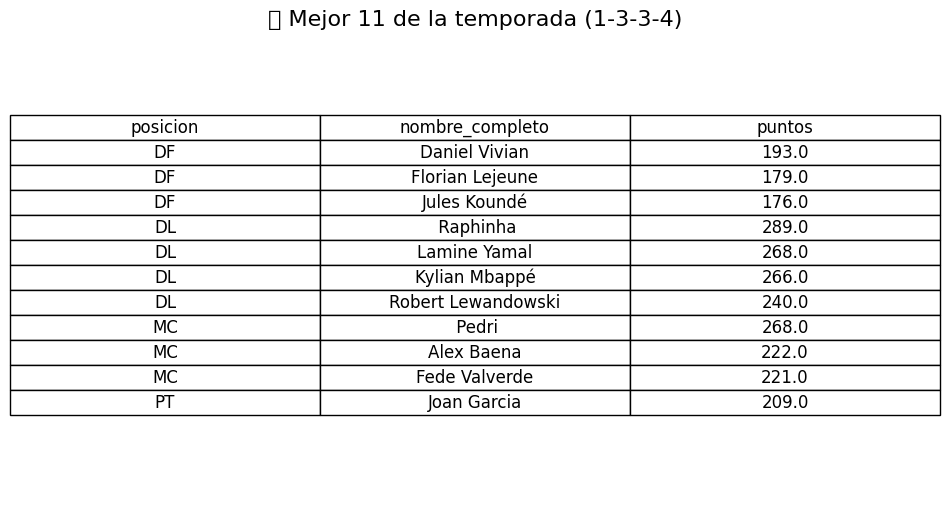

posicion    nombre_completo  puntos
      DF      Daniel Vivian   193.0
      DF    Florian Lejeune   179.0
      DF       Jules Koundé   176.0
      DL           Raphinha   289.0
      DL       Lamine Yamal   268.0
      DL      Kylian Mbappé   266.0
      DL Robert Lewandowski   240.0
      MC              Pedri   268.0
      MC         Alex Baena   222.0
      MC      Fede Valverde   221.0
      PT        Joan Garcia   209.0


In [ ]:
with conexion_db() as conn:
    query = """
        SELECT id_jugador, nombre, apellido, posicion, puntos
        FROM chavalitos.v_datos_jugador
        WHERE puntos IS NOT NULL AND puntos > 0
        and temporada = '24/25'
    """
    df = pd.read_sql(query, conn)

# 2. Asegurar tipos
df['puntos'] = df['puntos'].astype(float)
df['posicion'] = df['posicion'].str.upper().str.strip()

# 3. Mapeo de posiciones válidas
alineacion_deseada = {
    'PT': 1,
    'DF': 3,
    'MC': 3,
    'DL': 4
}

# 4. Seleccionar los mejores jugadores por posición
mejor_once = []

for pos, cantidad in alineacion_deseada.items():
    jugadores_pos = df[df['posicion'] == pos].sort_values(by='puntos', ascending=False).head(cantidad)
    mejor_once.append(jugadores_pos)

# 5. Concatenar todos
mejor_once_df = pd.concat(mejor_once).reset_index(drop=True)

# 6. Formatear y mostrar resultados
mejor_once_df['nombre_completo'] = mejor_once_df['nombre'].fillna('') + ' ' + mejor_once_df['apellido'].fillna('')
mejor_once_df = mejor_once_df[['posicion', 'nombre_completo', 'puntos']].sort_values(by='posicion')

# Mostrar como tabla bonita
import matplotlib.pyplot as plt
import matplotlib.table as tbl

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = tbl.table(
    ax,
    cellText=mejor_once_df.values,
    colLabels=mejor_once_df.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
plt.title("⚽ Mejor 11 de la temporada (1-3-3-4)", fontsize=16)
plt.show()

# También puedes imprimirlo por consola si no usas notebook
print(mejor_once_df.to_string(index=False))

# 28. Balance de cada persona

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\1679370674.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\juan_\AppData\Local\Temp\ipykernel_25636\1679370674.py:47: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.

C:\Users\juan_\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.



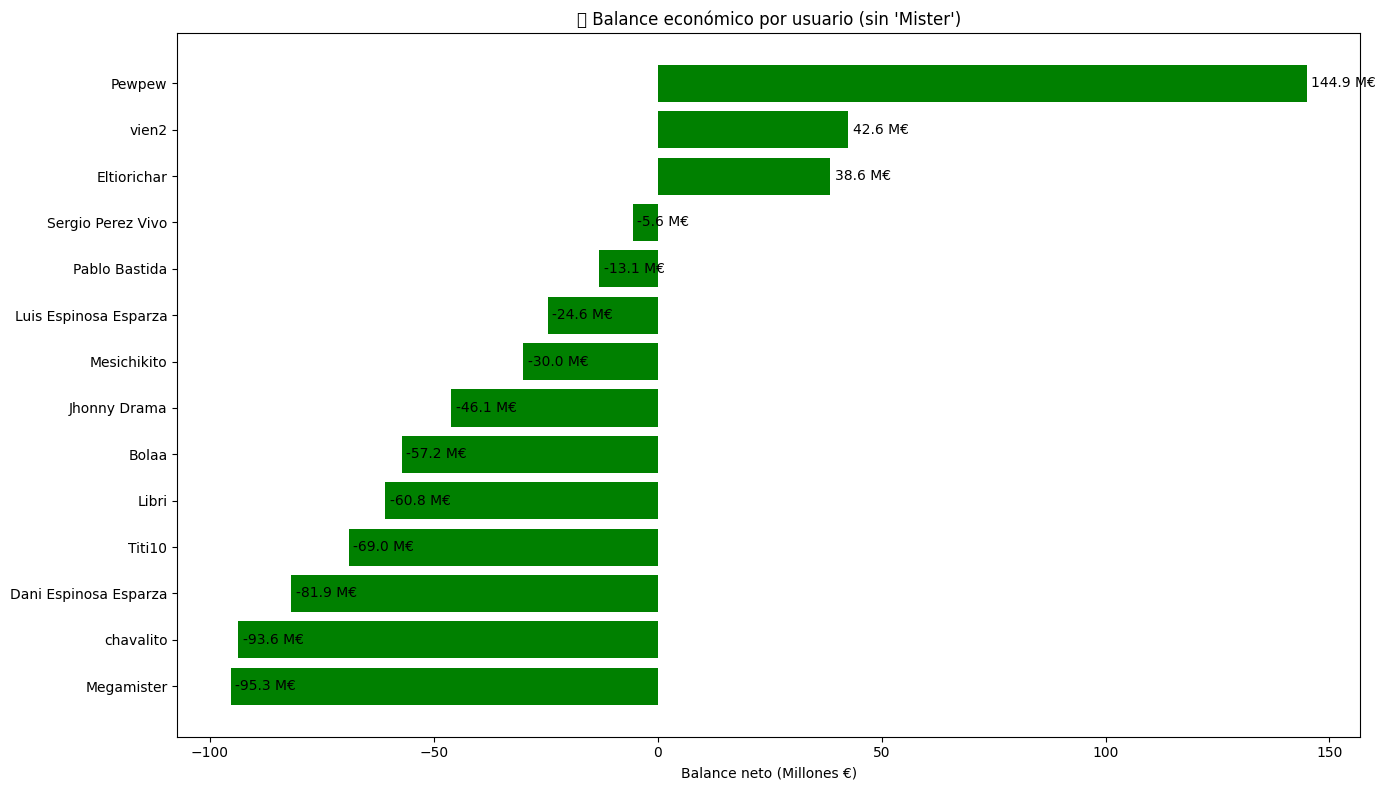

              usuario       ganado      gastado     balance
               Pewpew 1253329519.0 1108407627.0 144921892.0
                vien2 1241759658.0 1199200567.0  42559091.0
          Eltiorichar  840964644.0  802400625.0  38564019.0
    Sergio Perez Vivo  614326124.0  619948804.0  -5622680.0
        Pablo Bastida  231222038.0  244298813.0 -13076775.0
Luis Espinosa Esparza  607858187.0  632468472.0 -24610285.0
          Mesichikito  712262225.0  742280491.0 -30018266.0
         Jhonny Drama  400927940.0  447003069.0 -46075129.0
                Bolaa  241698584.0  298879213.0 -57180629.0
                Libri  624387331.0  685200069.0 -60812738.0
               Titi10  865328089.0  934348187.0 -69020098.0
Dani Espinosa Esparza  455034837.0  536906767.0 -81871930.0
            chavalito  201138705.0  294780089.0 -93641384.0
           Megamister  688028324.0  783319654.0 -95291330.0


In [ ]:
with conexion_db() as conn:
    query = """
        SELECT usuario_origen, usuario_destino, precio, tipo_operacion
        FROM chavalitos.v_transferencias
        WHERE precio IS NOT NULL
        AND fecha_transferencia BETWEEN '2024-08-15' AND '2025-06-30' 
    """
    df = pd.read_sql(query, conn)

# 2. Limpiar y convertir precios (eliminar puntos de separador de miles)
df['precio'] = df['precio'].astype(str).str.replace('.', '', regex=False).astype(float)

# 3. Filtrar transferencias entre usuarios válidos
df = df[(df['usuario_origen'].notnull()) & (df['usuario_destino'].notnull())]

# 4. Calcular dinero ganado por cada usuario (como origen)
df_ganado = df.groupby('usuario_origen')['precio'].sum().reset_index()
df_ganado.columns = ['usuario', 'ganado']

# 5. Calcular dinero gastado por cada usuario (como destino)
df_gastado = df.groupby('usuario_destino')['precio'].sum().reset_index()
df_gastado.columns = ['usuario', 'gastado']

# 6. Unir ambos
balance = pd.merge(df_ganado, df_gastado, on='usuario', how='outer').fillna(0)
balance['balance'] = balance['ganado'] - balance['gastado']

# 7. Eliminar "Mister"
balance = balance[balance['usuario'] != 'Mister']

# 8. Ordenar por balance
balance_sorted = balance.sort_values(by='balance', ascending=False)

# 9. Graficar todos los usuarios
plt.figure(figsize=(14, 8))
bars = plt.barh(balance_sorted['usuario'], balance_sorted['balance'] / 1_000_000, color='green')

# 10. Añadir etiquetas de valor a cada barra
for i, bar in enumerate(bars):
    valor = balance_sorted.iloc[i]['balance'] / 1_000_000
    plt.text(valor + 1, bar.get_y() + bar.get_height()/2,
             f"{valor:.1f} M€", va='center', fontsize=10)

plt.xlabel("Balance neto (Millones €)")
plt.title("🟢 Balance económico por usuario (sin 'Mister')")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 11. Mostrar tabla por consola
print(balance_sorted.to_string(index=False))

In [76]:
conn.close()